In [193]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_breast_cancer

# Import Dataset

In [194]:
data = load_breast_cancer()

cancer = pd.DataFrame(data.data, columns=data.feature_names)
# Add a target column, and fill it with the target data
cancer['target'] = data.target

cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,...,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,...,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,...,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,...,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,...,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,...,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Plot binary target variable

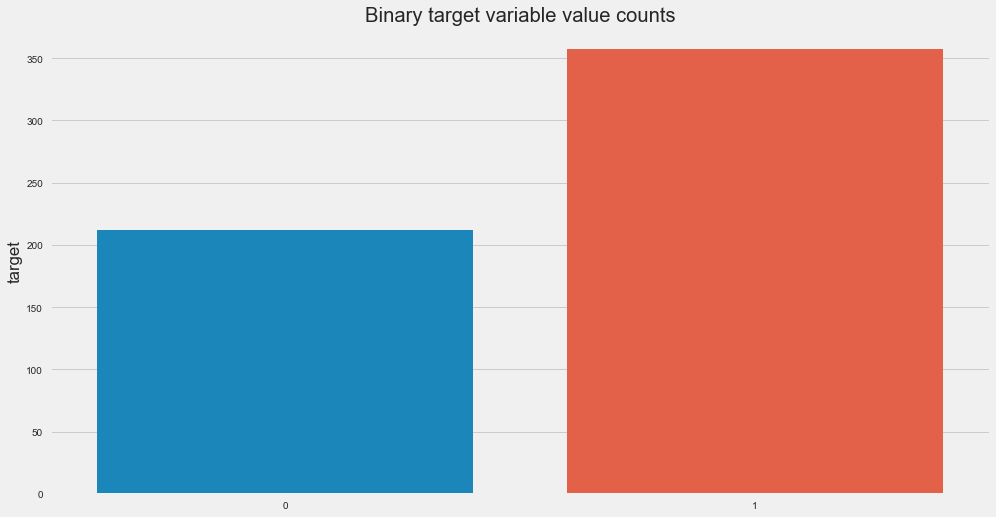

In [195]:
%matplotlib inline
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = cancer.target.value_counts().index, y=cancer.target.value_counts())
plt.title('Binary target variable value counts')
plt.savefig('/Users/maximilianstaebler/Library/Mobile Documents/com~apple~CloudDocs/code/towardsdatascience/evaluation-metrics/plots/valuecounts.png')
plt.show();

# Train model and retrieve evaluation metrics

In [196]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [197]:
# Train Test Split
X = cancer.drop('target', axis = 1)
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

print(f'X_train size: {len(X_train)}')
print(f'y_train size: {len(y_train)}')
print(f'X_test size: {len(X_test)}')
print(f'y_test size: {len(y_test)}')

X_train size: 426
y_train size: 426
X_test size: 143
y_test size: 143


In [198]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

LogisticRegression()

In [199]:
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 2))
print("Precision:", round(metrics.precision_score(y_test, y_pred), 4))
print("Recall:", round(metrics.recall_score(y_test, y_pred), 4))

Accuracy: 0.94
Precision: 0.9327
Recall: 0.9898


# Create skewed dataset (imbalanced)

In [200]:
cancer2 = pd.DataFrame(data.data, columns=data.feature_names)
# Add a target column, and fill it with the target data
cancer2['target'] = 0

cancer3 = pd.concat([cancer, cancer2])
cancer3.target.value_counts()

0    781
1    357
Name: target, dtype: int64

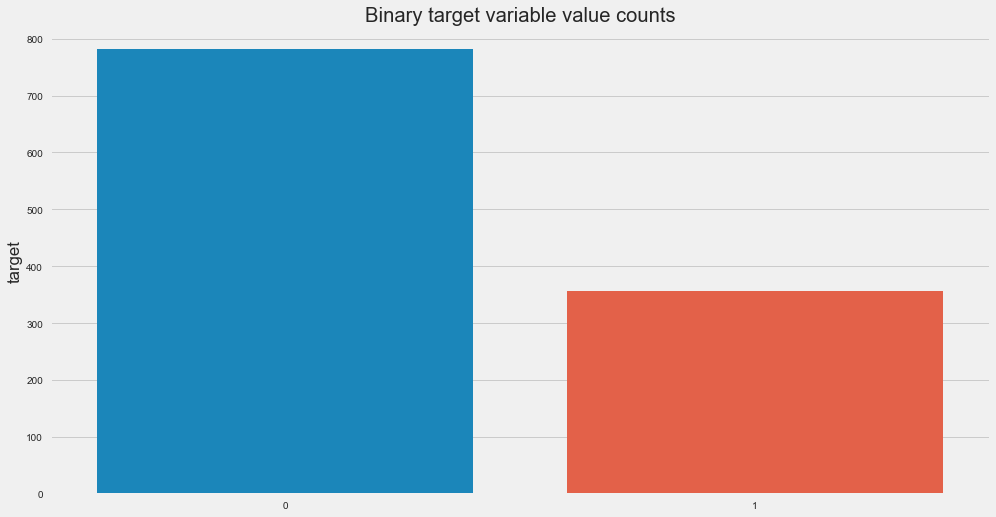

In [201]:
%matplotlib inline
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = cancer3.target.value_counts().index, y=cancer3.target.value_counts())
plt.title('Binary target variable value counts')
plt.savefig('/Users/maximilianstaebler/Library/Mobile Documents/com~apple~CloudDocs/code/towardsdatascience/evaluation-metrics/plots/valuecounts_skewed.png')
plt.show();

In [202]:
# Train Test Split
X = cancer3.drop('target', axis = 1)
y = cancer3.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

print(f'X_train size: {len(X_train)}')
print(f'y_train size: {len(y_train)}')
print(f'X_test size: {len(X_test)}')
print(f'y_test size: {len(y_test)}')

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 2))
print("Precision:", round(metrics.precision_score(y_test, y_pred), 4))
print("Recall:", round(metrics.recall_score(y_test, y_pred), 4))

X_train size: 853
y_train size: 853
X_test size: 285
y_test size: 285


LogisticRegression()

Accuracy: 0.71
Precision: 0.5244
Recall: 0.4943


## Thresholds

Use new `spam` dataset.

In [203]:
from sklearn import svm, datasets

# Load the dataset and split into train/test splits
data = pd.read_csv('spam.csv')
X = data.drop(['target', 'Unnamed: 0'], axis = 1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [205]:
X.head(2)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,...,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,...,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,...,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259


# Evaluate Classification with Yellowbrick

DiscriminationThreshold(ax=<AxesSubplot:>, force_model=None, model=None)

<AxesSubplot:title={'center':'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

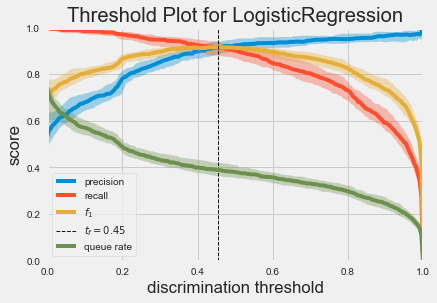

In [208]:
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import DiscriminationThreshold

# Instantiate the classification model and visualizer
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = DiscriminationThreshold(model)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show(outpath="./plots/discriminationthreshold.png")   

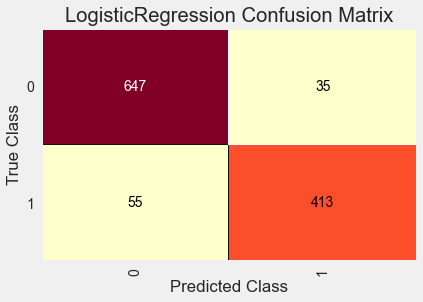

ConfusionMatrix(ax=<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1],
                cmap=<matplotlib.colors.ListedColormap object at 0x7fb5507b3d90>,
                model=None)

<Figure size 432x288 with 0 Axes>

In [209]:
from yellowbrick.classifier import confusion_matrix

# Instantiate the visualizer with the classification model
confusion_matrix(
    LogisticRegression(),
    X_train, y_train, X_test, y_test,
    classes=[0, 1]
)
plt.tight_layout()

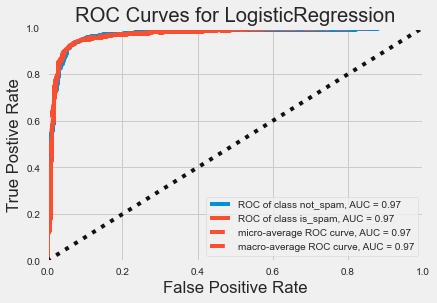

In [210]:
# Instantiate the visualizer with the classification model
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=["not_spam", "is_spam"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show(outpath="./plots/roc_auc.png");

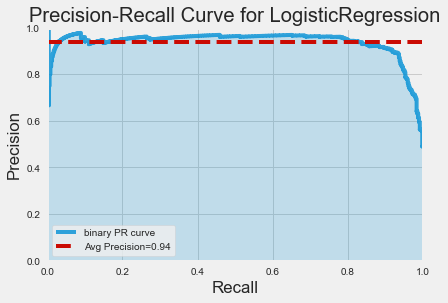

In [211]:
from yellowbrick.classifier import PrecisionRecallCurve

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(LogisticRegression(random_state=7))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show(outpath="./plots/precisionrecallcurve.png");